In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
# Misc
import os, sys
from glob import glob

In [3]:
import random

In [4]:
# Dataframes and such
import pandas as pd
import numpy as np

In [5]:
# Plotting
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Ipython stuff
import IPython
import IPython.display as ipd

In [7]:
# Audio stuff
import librosa
import librosa.display

In [8]:
DATA_FOLDER = "../data/gtzan"

## Sample audio files

In [9]:
# Had to remove jazz file #54 because of corruption, apparently

In [10]:
# Make a list of all the wav files in the dataset and store them in a variable
audio_files = glob(f"{DATA_FOLDER}/*/*.wav")

In [11]:
random_file = random.choice(audio_files)
print(f"Showing random file {os.path.basename(random_file)}")
ipd.Audio(random_file)

Showing random file hiphop.00073.wav


In [12]:
# Load audio file with librosa
y, sr = librosa.load(random_file)

print(f"y is a {type(y)}, sr is a {type(sr)}")
print(f"First 10 elements of y: {y[:10]}")
print(f"Shape of Y: {y.shape}")
print(f"Sample Rate: {sr}")

y is a <class 'numpy.ndarray'>, sr is a <class 'int'>
First 10 elements of y: [0.2793274  0.2852173  0.29180908 0.29071045 0.28753662 0.2767334
 0.2977295  0.29122925 0.2774353  0.294281  ]
Shape of Y: (661794,)
Sample Rate: 22050


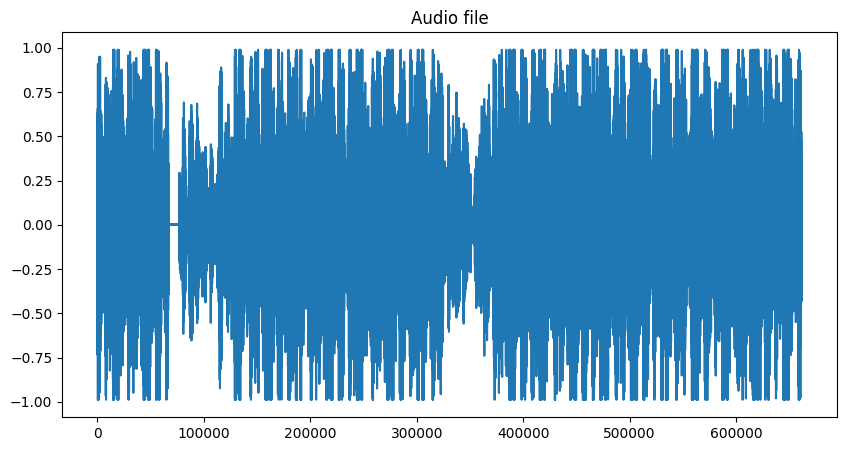

In [13]:
# Plot the actual wave
plt.figure(figsize=(16, 8))
pd.Series(y).plot(figsize=(10, 5), title="Audio file");

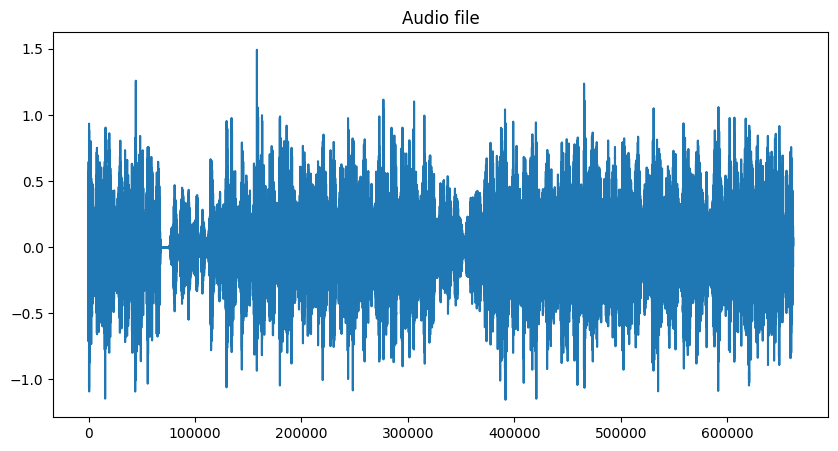

In [32]:
# Plot the actual wave
plt.figure(figsize=(16, 8))
pd.Series(y_pitch).plot(figsize=(10, 5), title="Audio file");

In [17]:
from librosa.effects import pitch_shift

In [33]:
y_pitch = pitch_shift(y, sr=sr, n_steps=2.7)

In [29]:
ipd.Audio(random_file)

In [34]:
ipd.Audio(y_pitch, rate=sr)

### MEL Spectrograms

In [14]:
# apply mel spectogram without STFT

hop_length = 512

n_fft = 2048
n_mels = 512

In [15]:
S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, n_mels=n_mels, hop_length=hop_length)
print("Shape of Mel Spectogram", S.shape)

# use that converting function as above
S_db_mel = librosa.amplitude_to_db(S, ref=np.max)

Shape of Mel Spectogram (512, 1293)


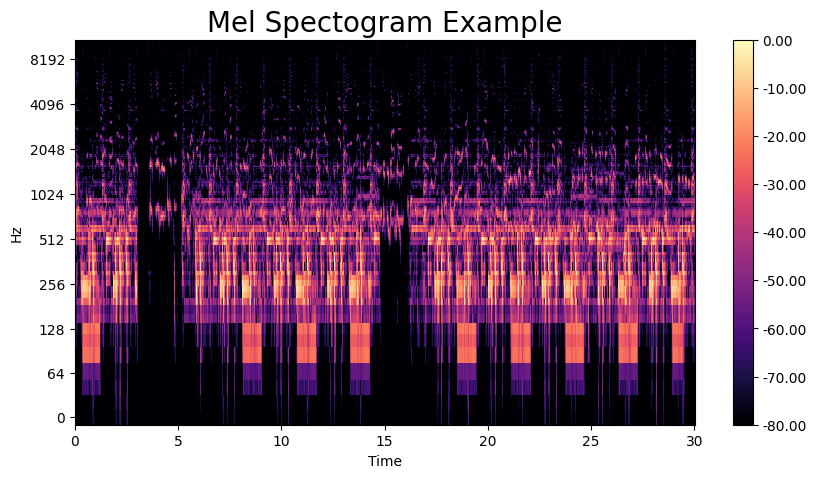

In [16]:
# plot the mel spectogram
fig, ax = plt.subplots(figsize=(10,5))
img = librosa.display.specshow(S_db_mel, x_axis='time', y_axis='log', ax=ax)
ax.set_title('Mel Spectogram Example', fontsize=20)
fig.colorbar(img, ax=ax, format=f'%0.2f');